In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [ ]:
df= pd.read_csv('/content/transaction_dataset.csv')

In [ ]:
df

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(9841, 51)

In [ ]:
df.dtypes

Unnamed: 0                                                int64
Index                                                     int64
Address                                                  object
FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                            

In [ ]:
# feature_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
#        'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
#        'V22', 'V23', 'V24', 'V25']

In [ ]:
# df=df_raw.drop(['Time','Class', 'Amount', 'V26','V27','V28'], axis=1)

In [ ]:
#now remove the white space in the columns name
df.columns=df.columns.str.strip().str.replace(r'\b\s+\b','_',regex=True)
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg_min_between_sent_tnx',
       'Avg_min_between_received_tnx',
       'Time_Diff_between_first_and_last (Mins)', 'Sent_tnx', 'Received_Tnx',
       'Number_of_Created_Contracts', 'Unique_Received_From_Addresses',
       'Unique_Sent_To_Addresses', 'min_value_received', 'max_value_received',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract',
       'total_transactions (including_tnx_to_create_contract',
       'total_Ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance', 'Total_ERC20_tnxs',
       'ERC20_total_Ether_received', 'ERC20_total_ether_sent',
       'ERC20_total_Ether_sent_contract', 'ERC20_uniq_sent_addr',
       'ERC20_uniq_rec_addr', 'ERC20_uniq_sent_addr.1',
       'ERC20_uniq_rec_contract_addr', 'ERC20_avg_time_between_sent_tnx',
       'ERC20_avg_time_be

In [ ]:
#check for presence of duplicate
df.duplicated(subset='Index').sum()

5112

In [ ]:
#Proportion of FLag in overall data FLAG: whether the transaction is fraud or not
df['FLAG'].value_counts(normalize=True)

FLAG
0    0.778579
1    0.221421
Name: proportion, dtype: float64

**0:-**means 77% is not fraud

**1:-**means 22% is fraud

In [ ]:
#in the above we see that the there are huge duplicate value then we can not neglect , we see what is the distribution of the duplicate lies
#Proportion of flag in duplicate rows
df[df.duplicated(subset='Index')]['FLAG'].value_counts(normalize=True)

FLAG
0    0.573748
1    0.426252
Name: proportion, dtype: float64

in the above case(overall data) we see that the fraud case is the double in this case of specific filter . in this case we can not drop the duplicate data

the another strong point , thetb the chunk data is huge and distribution is so effective

In [ ]:
#check duplicate without index column # in the above we check the duplicate value using infdex , now we check the duplicate value in the entire row
df.duplicated().sum()

0

In [ ]:
#drop the unwanted the columns
df=df.drop(columns=['Unnamed: 0','Index','Address'])

In [ ]:
#seperate the categorical variables
categories=df.select_dtypes(include='object').columns
categories

Index(['ERC20_most_sent_token_type', 'ERC20_most_rec_token_type'], dtype='object')

In [ ]:
#inspect categoricals
for i in df[categories].columns:
  print(f'the categorical column{i} has {df[i].nunique()} unique values and {df[i].isnull().sum()} missibg value')

the categorical columnERC20_most_sent_token_type has 304 unique values and 2697 missibg value
the categorical columnERC20_most_rec_token_type has 466 unique values and 871 missibg value


we need to unique value because the IF is another algorithm , those is an unsupervised alg. the data need in numeric formate , when is given as an  input .

In [ ]:
#seperate the numerical variables
numerics=df.select_dtypes(include='number').columns
numerics

Index(['FLAG', 'Avg_min_between_sent_tnx', 'Avg_min_between_received_tnx',
       'Time_Diff_between_first_and_last (Mins)', 'Sent_tnx', 'Received_Tnx',
       'Number_of_Created_Contracts', 'Unique_Received_From_Addresses',
       'Unique_Sent_To_Addresses', 'min_value_received', 'max_value_received',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract',
       'total_transactions (including_tnx_to_create_contract',
       'total_Ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance', 'Total_ERC20_tnxs',
       'ERC20_total_Ether_received', 'ERC20_total_ether_sent',
       'ERC20_total_Ether_sent_contract', 'ERC20_uniq_sent_addr',
       'ERC20_uniq_rec_addr', 'ERC20_uniq_sent_addr.1',
       'ERC20_uniq_rec_contract_addr', 'ERC20_avg_time_between_sent_tnx',
       'ERC20_avg_time_between_rec_tnx', 'ERC20_avg_time_between_r

In [ ]:
#check feature with constant variance   , constant feartute variance and std is 0
df[numerics].var()[df[numerics].var()==0].index
constant_cols=df[numerics].var()[df[numerics].var()==0].index
constant_cols

Index(['ERC20_avg_time_between_sent_tnx', 'ERC20_avg_time_between_rec_tnx',
       'ERC20_avg_time_between_rec_2_tnx',
       'ERC20_avg_time_between_contract_tnx', 'ERC20_min_val_sent_contract',
       'ERC20_max_val_sent_contract', 'ERC20_avg_val_sent_contract'],
      dtype='object')

constant column never be a good predictor in any purpose.

In [ ]:
#drop the constant feature
df.drop(constant_cols, axis=1, inplace=True)

In [ ]:
df

,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last (Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,...,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0,,GSENetwork
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0,,Blockwell say NOTSAFU
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1=df.drop(['ERC20_most_sent_token_type', 'ERC20_most_rec_token_type'], axis=1, inplace=False)


In [ ]:
# Calculate correlation matrix
correlation_matrix = df1.corr()

correlation_matrix

,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last (Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,...,ERC20_uniq_sent_addr.1,ERC20_uniq_rec_contract_addr,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name
FLAG,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.031941,-0.045584,-0.021641,...,-0.003047,-0.018527,0.011163,-4.313011e-03,0.007881,0.025364,0.025038,0.025044,0.009249,-0.018047
Avg_min_between_sent_tnx,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.015912,-0.017688,-0.014886,...,-0.012754,0.045615,0.004673,-2.455932e-03,-0.003149,-0.001687,-0.002020,-0.001965,0.000529,0.047202
Avg_min_between_received_tnx,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.029571,-0.025747,-0.045753,...,-0.014698,-0.014932,-0.008319,-3.544424e-03,-0.005606,-0.003758,-0.003780,-0.003727,-0.019896,-0.014966
Time_Diff_between_first_and_last (Mins),-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,0.037043,0.071140,-0.084996,...,0.019961,0.319176,-0.010543,4.651212e-02,0.049020,-0.006852,-0.006268,-0.006802,0.263939,0.324288
Sent_tnx,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.130064,0.670014,0.024015,...,-0.008379,0.219665,-0.003868,4.291143e-03,0.008843,-0.001557,-0.001019,-0.001415,0.079728,0.220614
Received_Tnx,-0.079316,-0.035735,-0.053478,0.148376,0.198455,1.000000,-0.003838,0.648655,0.164112,-0.022936,...,0.337727,0.201686,-0.004464,1.537920e-02,0.019126,-0.001899,-0.000744,-0.000918,0.042681,0.202747
Number_of_Created_Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.002211,0.084598,-0.001542,...,-0.001083,0.028986,-0.000788,9.202945e-04,0.002052,-0.000092,0.000149,-0.000070,0.006033,0.030089
Unique_Received_From_Addresses,-0.031941,-0.015912,-0.029571,0.037043,0.130064,0.648655,-0.002211,1.000000,0.159829,-0.012939,...,0.241494,0.147741,-0.001999,1.603025e-03,0.003592,-0.001044,-0.000261,-0.000546,0.040674,0.148851
Unique_Sent_To_Addresses,-0.045584,-0.017688,-0.025747,0.071140,0.670014,0.164112,0.084598,0.159829,1.000000,0.070145,...,-0.005345,0.237351,-0.002333,3.598439e-03,0.005246,-0.000967,-0.000439,-0.000827,0.084897,0.237520
min_value_received,-0.021641,-0.014886,-0.045753,-0.084996,0.024015,-0.022936,-0.001542,-0.012939,0.070145,1.000000,...,-0.007365,-0.003216,-0.001154,-1.670077e-03,-0.002852,-0.001498,-0.001529,-0.001477,-0.028810,-0.002695


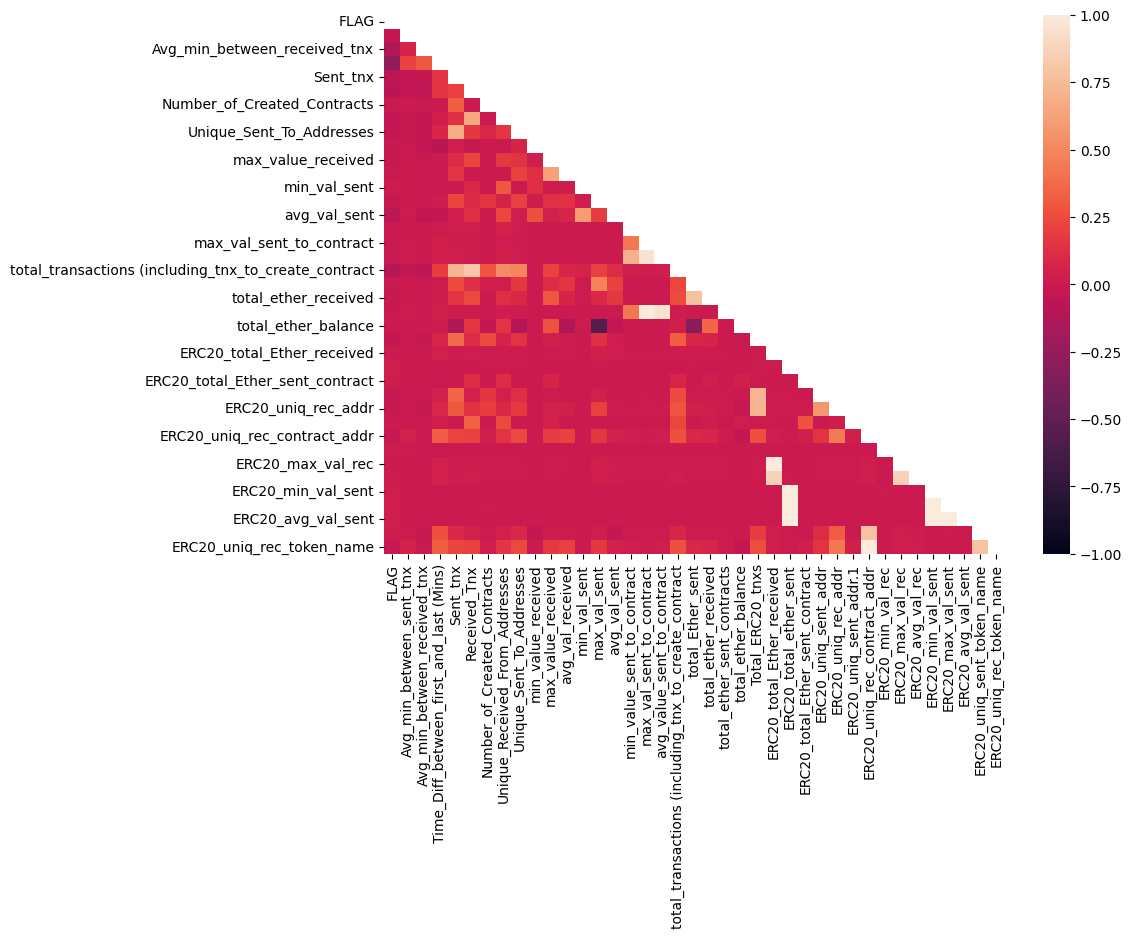

In [ ]:
#correlation matrix
plt.figure(figsize=(10,7))
numerics=df.select_dtypes(include='number').columns
corr=df[numerics].corr()
mask=np.zeros_like(corr) #create the correlation matris with allentires is zeros
mask[np.triu_indices_from(mask)]=True  #create the only lower triangular matrix
#mask[np.triu_indices_from(mask)]=False #create the whule matrix
sns.heatmap(corr,mask=mask, annot=False, vmin=-1,vmax=1)
plt.show()

here we see that the (bright) give the stong positive correlation and dark color give the stong negative correlation

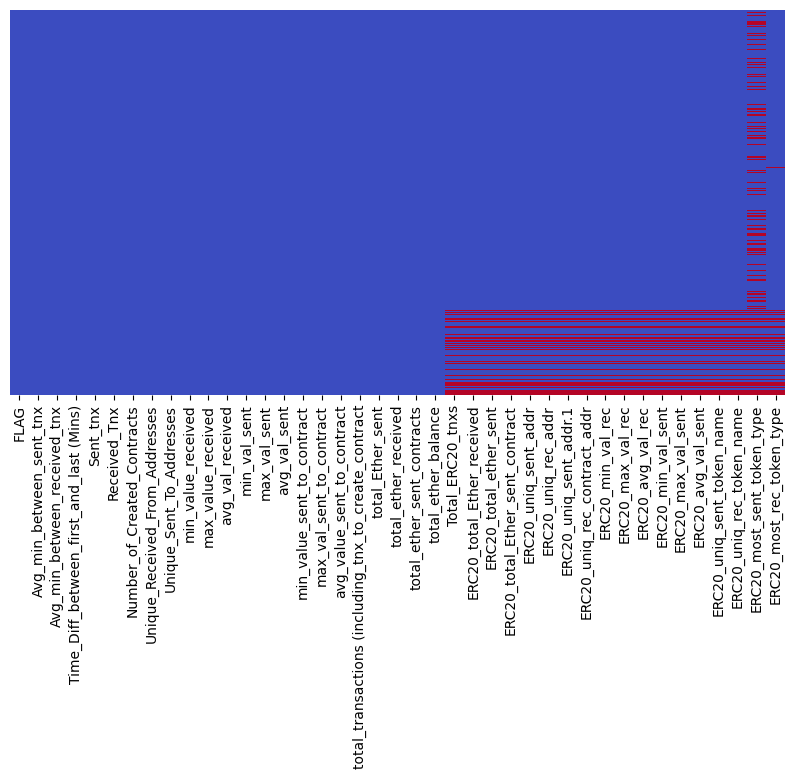

In [ ]:
#visualize the missings pattern of the dataframe
# df.isnull() return the colllection of boolean ( True , False ), missing value= True
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cmap='coolwarm',cbar=False)
plt.yticks([])
plt.show()

now we check the pattern of the missing value , it is required for the IF, because we can not give the in complete data.

We see in the plot the red line denote the presence of the missing value

In [ ]:
#count rows with missing data
missing_rows_count=df.isnull().any(axis=1).sum()
print(f'the number of row with missing data is:{missing_rows_count}')

the number of row with missing data is:2720


In [ ]:
#check the FLAG variable rows with missing data
missing_mask=df.isnull().any(axis=1) #return the boolian
print(df.loc[missing_mask , 'FLAG'].value_counts())
print("------------------")
print(round(df.loc[missing_mask , 'FLAG'].value_counts(normalize=True), 2))

FLAG
0    1891
1     829
Name: count, dtype: int64
------------------
FLAG
0    0.7
1    0.3
Name: proportion, dtype: float64


**Comment** we see that the total missing row data 2720 , in this row data we found that the 1891 row data report the  non fraud transaction , 829 row report the  fraud transaction

In [ ]:
#check the overalldata
print(df['FLAG'].value_counts())
print("..............")
print(round(df['FLAG'].value_counts(normalize=True), 3 ))

FLAG
0    7662
1    2179
Name: count, dtype: int64
..............
FLAG
0    0.779
1    0.221
Name: proportion, dtype: float64


**comment** we see that the in the total data the proportion of fraud transaction is .22%

In [ ]:
#rows other than ones with missing data
#find the outlier in the ramaing data which is not affected by missing value
print(df[~missing_mask].shape) #missing_mask=df.isnull().any(axis=1) #return the boolian
df_sub=df[~missing_mask]

(7121, 41)


In [ ]:
df

,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last (Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,...,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0,NaN,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0,,GSENetwork
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0,,Blockwell say NOTSAFU
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
categories

Index(['ERC20_most_sent_token_type', 'ERC20_most_rec_token_type'], dtype='object')

In [ ]:
# from category_encoders import TargetEncoder
# #initialize the target encoder
# encoder=TargetEncoder(cols=categories)

# #fit and transform the train data
# df=encoder.fit_transform(df)

# # #transform the test data
# # X_test_encoded=encoder.transform(X_test)

In [ ]:
X=df.drop('FLAG', axis=1)

In [ ]:
X

,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last (Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received,...,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,...,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0,Cofoundit,Numeraire
1,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,...,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0,Livepeer Token,Livepeer Token
2,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,...,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0,NaN,XENON
3,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,...,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0,Raiden,XENON
4,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,...,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,...,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0,,GSENetwork
9837,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,...,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0,,Blockwell say NOTSAFU
9838,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,...,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,0.00,0.00,0.00,0,1,0,1,0,0.500000,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
!pip install category_encoders

In [ ]:
from sklearn.model_selection import train_test_split

X = df_sub.drop('FLAG', axis=1)
y = df_sub['FLAG']  # Use df instead of df_sub here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [ ]:
X_train

,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last (Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received,...,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
6594,2.72,0.52,9.18,3,2,0,2,3,634.251679,1366.748321,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.000000,0.0,0.0,0,0
6907,107.23,0.84,323.38,3,2,0,2,3,49.414538,51.585462,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.000000,0.0,0.0,0,0
2538,155.89,0.00,311.78,2,1,0,1,2,101.000000,101.000000,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.000000,0.0,0.0,0,0
1415,0.71,29707.33,59416.08,2,2,0,2,2,1.410000,1.533428,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.000000,0.0,0.0,0,0
178,1.56,0.00,4.68,3,2,0,2,3,98.623720,1902.376280,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.000000,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6953,0.00,0.00,24.43,1,1,0,1,1,3.995000,3.995000,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.000000,0.0,0.0,0,0
5400,4600.03,6634.30,1029417.03,156,47,0,27,61,0.004250,25.000000,...,0.0,1.553054e+09,1.206508e+07,0.0,30420.8984,2882.345308,35.0,69.0,Dai Stablecoin v1.0,BAT
1790,12053.29,5797.14,478459.48,32,16,0,4,14,0.045000,170.430500,...,0.0,3.455742e+05,2.426120e+04,0.0,766990.0000,74643.780840,7.0,24.0,BAT,MobileGo
4607,1865.94,12424.90,958759.38,81,65,0,11,1,0.004985,70.203000,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.000000,0.0,0.0,0,0


In [ ]:
y_train

In [ ]:
from category_encoders import TargetEncoder
#initialize the target encoder
encoder=TargetEncoder(cols=categories)

#fit and transform the train data
X_train_encoded=encoder.fit_transform(X_train,y_train)

#transform the test data
X_test_encoded=encoder.transform(X_test)

# #combining the input features X and the target variable y into a single DataFrame
# train=pd.concat([X_train_encoded,y_train], axis=1)
test=pd.concat([X_test_encoded, y_test], axis=1)

In [ ]:
X_test_encoded

In [ ]:
X_train_encoded

,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last (Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received,...,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
6594,2.72,0.52,9.18,3,2,0,2,3,634.251679,1366.748321,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.000000
6907,107.23,0.84,323.38,3,2,0,2,3,49.414538,51.585462,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.000000
2538,155.89,0.00,311.78,2,1,0,1,2,101.000000,101.000000,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.000000
1415,0.71,29707.33,59416.08,2,2,0,2,2,1.410000,1.533428,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.000000
178,1.56,0.00,4.68,3,2,0,2,3,98.623720,1902.376280,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6953,0.00,0.00,24.43,1,1,0,1,1,3.995000,3.995000,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.000000
5400,4600.03,6634.30,1029417.03,156,47,0,27,61,0.004250,25.000000,...,0.0,1.553054e+09,1.206508e+07,0.0,30420.8984,2882.345308,35.0,69.0,0.158835,0.066564
1790,12053.29,5797.14,478459.48,32,16,0,4,14,0.045000,170.430500,...,0.0,3.455742e+05,2.426120e+04,0.0,766990.0000,74643.780840,7.0,24.0,0.078814,0.190067
4607,1865.94,12424.90,958759.38,81,65,0,11,1,0.004985,70.203000,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.000000


In [ ]:
y_train

In [ ]:
# #combining the input features X and the target variable y into a single DataFrame
# train=pd.concat([X_train_encoded,y_train], axis=1)
test=pd.concat([X_test_encoded, y_test], axis=1)

In [ ]:
test

,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last (Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received,...,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type,FLAG
8125,215.61,198.14,4807.72,3,21,0,15,3,0.050000,7.067599,...,0.00,0.0000,100.0,100.0000,100.0000,1.0,0.0,0.258017,0.488694,1
6049,22.84,0.00,68.53,3,1,0,1,3,101.000000,101.000000,...,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0
4100,0.00,0.00,1.35,1,1,0,1,1,6.291000,6.291000,...,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0
8615,2072.76,62.84,113251.82,51,120,0,105,42,0.002055,30.430000,...,500000.00,6524.7327,0.0,763665.1111,21153.6455,39.0,64.0,0.323628,0.373616,1
3275,106.57,0.30,320.30,3,2,0,2,2,39.358664,61.641336,...,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9807,0.00,114.43,163584.83,1,3,0,3,1,0.003369,0.990420,...,13.37,13.3700,0.0,0.0000,0.0000,0.0,1.0,1.000000,1.000000,1
3600,2.66,0.00,7.98,3,2,0,2,3,512.388539,1488.611461,...,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0
5874,11.03,20845.88,250283.00,12,12,0,10,1,1.793126,11.614130,...,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0
6918,44.54,49757.89,99604.87,2,2,0,1,1,0.510000,4.500000,...,0.00,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.000000,0.000000,0


In [ ]:
from sklearn.ensemble import IsolationForest

#create an isolatiiopn forest model
clfIF=IsolationForest(contamination='auto', random_state=42)
clfLOF=LocalOutlierFactor(n_neighbors=20,algorithm='auto', leaf_size=30, metric='euclidean', p=2, metric_params=None, contamination='auto',n_jobs=None)
#train the model on the training set
clfIF.fit(X_train_encoded,y_train)

IsolationForest(random_state=42)

In [ ]:
start =datetime.datetime.now()
#train the model on the training set
clfIF.fit(X_train_encoded,y_train)
y_pred_train=clfIF.predict(X_train_encoded)
end=datetime.datetime.now()
print(end-start)

0:00:00.620944


In [ ]:
start =datetime.datetime.now()
#train the model on the training set
# clfIF.fit(X_train_encoded,y_train)
y_pred_train_lof=clfLOF.fit_predict(X_train_encoded,y_train)
end=datetime.datetime.now()
print(end-start)

0:00:00.259630


In [ ]:
y_train

6594    0
6907    0
2538    0
1415    0
178     0
       ..
6953    0
5400    0
1790    0
4607    0
4769    0
Name: FLAG, Length: 5696, dtype: int64

In [ ]:
y_pred_train

In [ ]:
y_train

In [ ]:
clfIF.fit(X_test_encoded,y_test)

IsolationForest(random_state=42)

In [ ]:
#PREDICT OUTLIERS on noth training and testing sets
# -1 indicates outliers in the trianing set
# anomaly_train_pred=clfIF.predict(train)
y_pred_test=clfIF.predict(X_test_encoded)

# #LOF
# anomaly_train_pred_lof=clfLOF.fit_predict(train)
anomaly_test_pred_lof=clfLOF.fit_predict(X_test_encoded, y_test)


#print the outlier in the training and testring set
is_train=np.sum(y_pred_train==-1)
is_test=np.sum(y_pred_test==-1)
# is_train_lof=np.sum(y_pred_train==-1)
# is_test_lof=np.sum(anomaly_test_pred==-1)



print('number of outlier in the training set:', is_train)
print('number of outlier in the testing set:', is_test)
# print('number of outlier in the training set:', is_train_lof)
# print('number of outlier in the testing set:', is_test_lof)

number of outlier in the training set: 178
number of outlier in the testing set: 50


In [ ]:
df

**TSNE** is an algorithm used for dimensionality reduction, particularly well-suited for visualizing high-dimensional data in lower dimensions.

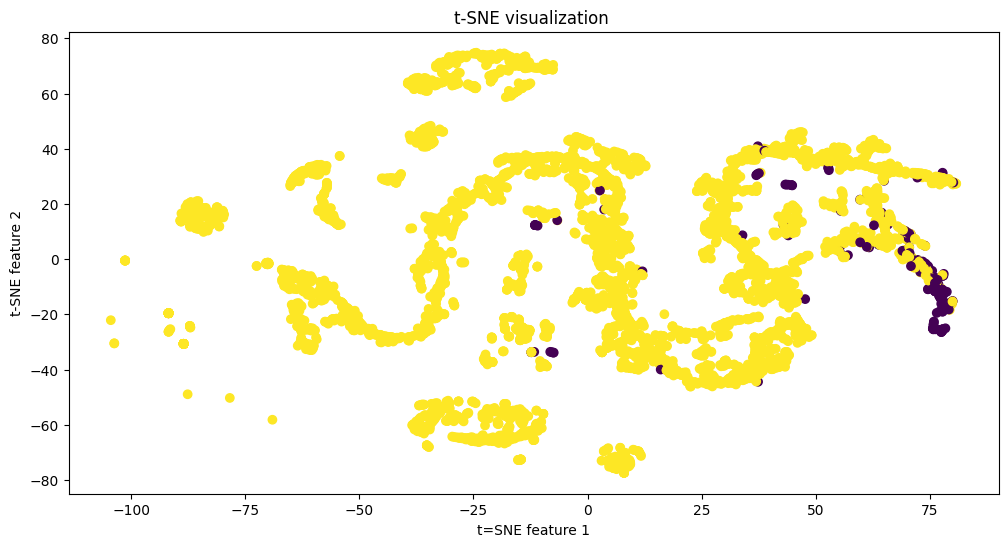

In [ ]:
from sklearn.manifold import TSNE
#create and fit tsne transformer
tsne=TSNE(n_components=2, random_state=123)# 2 components for 2D visualization
X_train_tsne=tsne.fit_transform(X_train_encoded)

#visualize the transformed data
plt.figure(figsize=(12,6))
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1], c=anomaly_train_pred)
plt.title('t-SNE visualization ')
plt.xlabel('t=SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

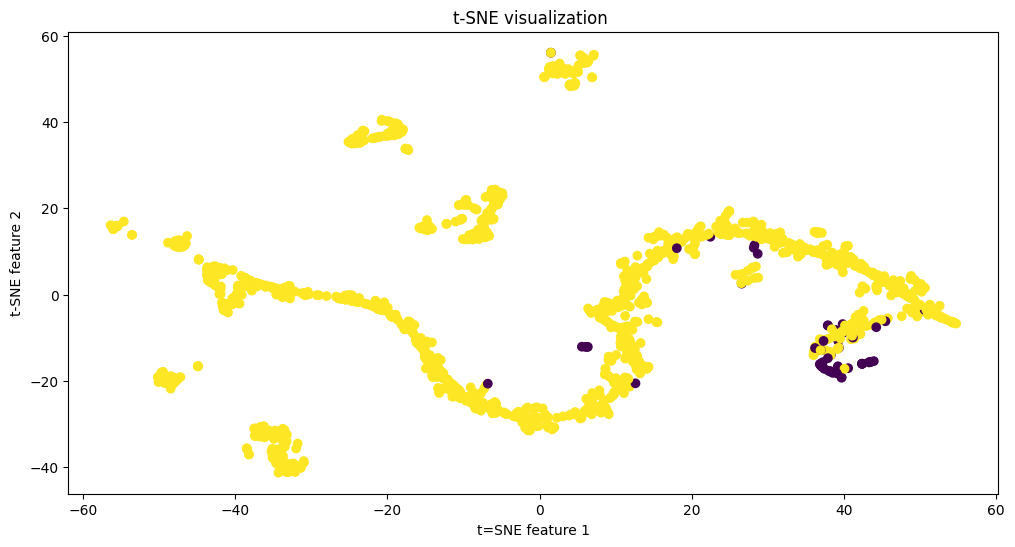

In [ ]:
X_test_tsne=tsne.fit_transform(X_test_encoded)

#visualize the transformed data
plt.figure(figsize=(12,6))
plt.scatter(X_test_tsne[:,0],X_test_tsne[:,1], c=anomaly_test_pred)
plt.title('t-SNE visualization ')
plt.xlabel('t=SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

In [ ]:
clfIF=model=IsolationForest(n_estimators=100,max_samples='auto',contamination='auto',random_state=123)  #random state = randomly pick the feature ,n_estimators= means 100 decision tree
clfLOF=LocalOutlierFactor(n_neighbors=20,algorithm='auto', leaf_size=30, metric='euclidean', p=2, metric_params=None, contamination='auto',n_jobs=None)

#Kuddcupp99

In [ ]:
# import numpy as np
# from sklearn.datasets import fetch_kddcup99
# from sklearn.model_selection import train_test_split

# X, y = fetch_kddcup99(
#     subset="SA", percent10=True, random_state=42, return_X_y=True, as_frame=True
# )
# y = (y != b"normal.").astype(np.int32)
# X, _, y, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)

# n_samples, anomaly_frac = X.shape[0], y.mean()
# print(f"{n_samples} datapoints with {y.sum()} anomalies ({anomaly_frac:.02%})")

In [ ]:
#data taken from https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_outlier_detection_bench.html#sphx-glr-auto-examples-miscellaneous-plot-outlier-detection-bench-py